# Lab 12: Modeling - Rohit Jayakumar Nair

This lab is meant to be short so you can experiment with multiple models, feature engineering methods, etc.

## #1

Build a model using the flights data to predict departure delay. Remember to split your data, examine your data, select features, choose some models to try, train the models, and choose one (possibly based on scoring the models).
- Be careful to avoid leakage! Make sure all of your features make sense as predictors.
- Think: do you need a classification or regression model?
    - Some regression models: Linear Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor
    - Some classification models: Gaussian Naive Bayes, Decision Tree Classifier, Random Forest Classifier
- You will find that our features include some categorical variables. We did not spend much time on how to deal with categorical (non-numeric) variables in class. You may either A) drop these features or B) if you're feeling ambitious, look into a technique like one-hot encoding. Look at `sklearn.preprocessing.OneHotEncoder`, or the simpler `pd.get_dummies`.

Note that you may not be able to build a very predictive model without substantial feature engineering.
Consider why this might be so.
Would supplemental data improve your model?

In [1]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the dataset
flights = pd.read_csv('C:/Users/rohit/Downloads/intro-python-datasci-master/intro-python-datasci-master/data/flights.csv')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [3]:
#Data Wrangling
#Determine the datatype of the variables in the input dataset
flights.dtypes

#We have a combination of categorical and numerical variables in the input dataset

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [4]:
#Determine null values
#Handling missing values
flights.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [5]:
flights.dropna(inplace=True)
flights.shape

(327346, 19)

In [6]:
#De-duplication
flights.drop_duplicates(inplace = True)

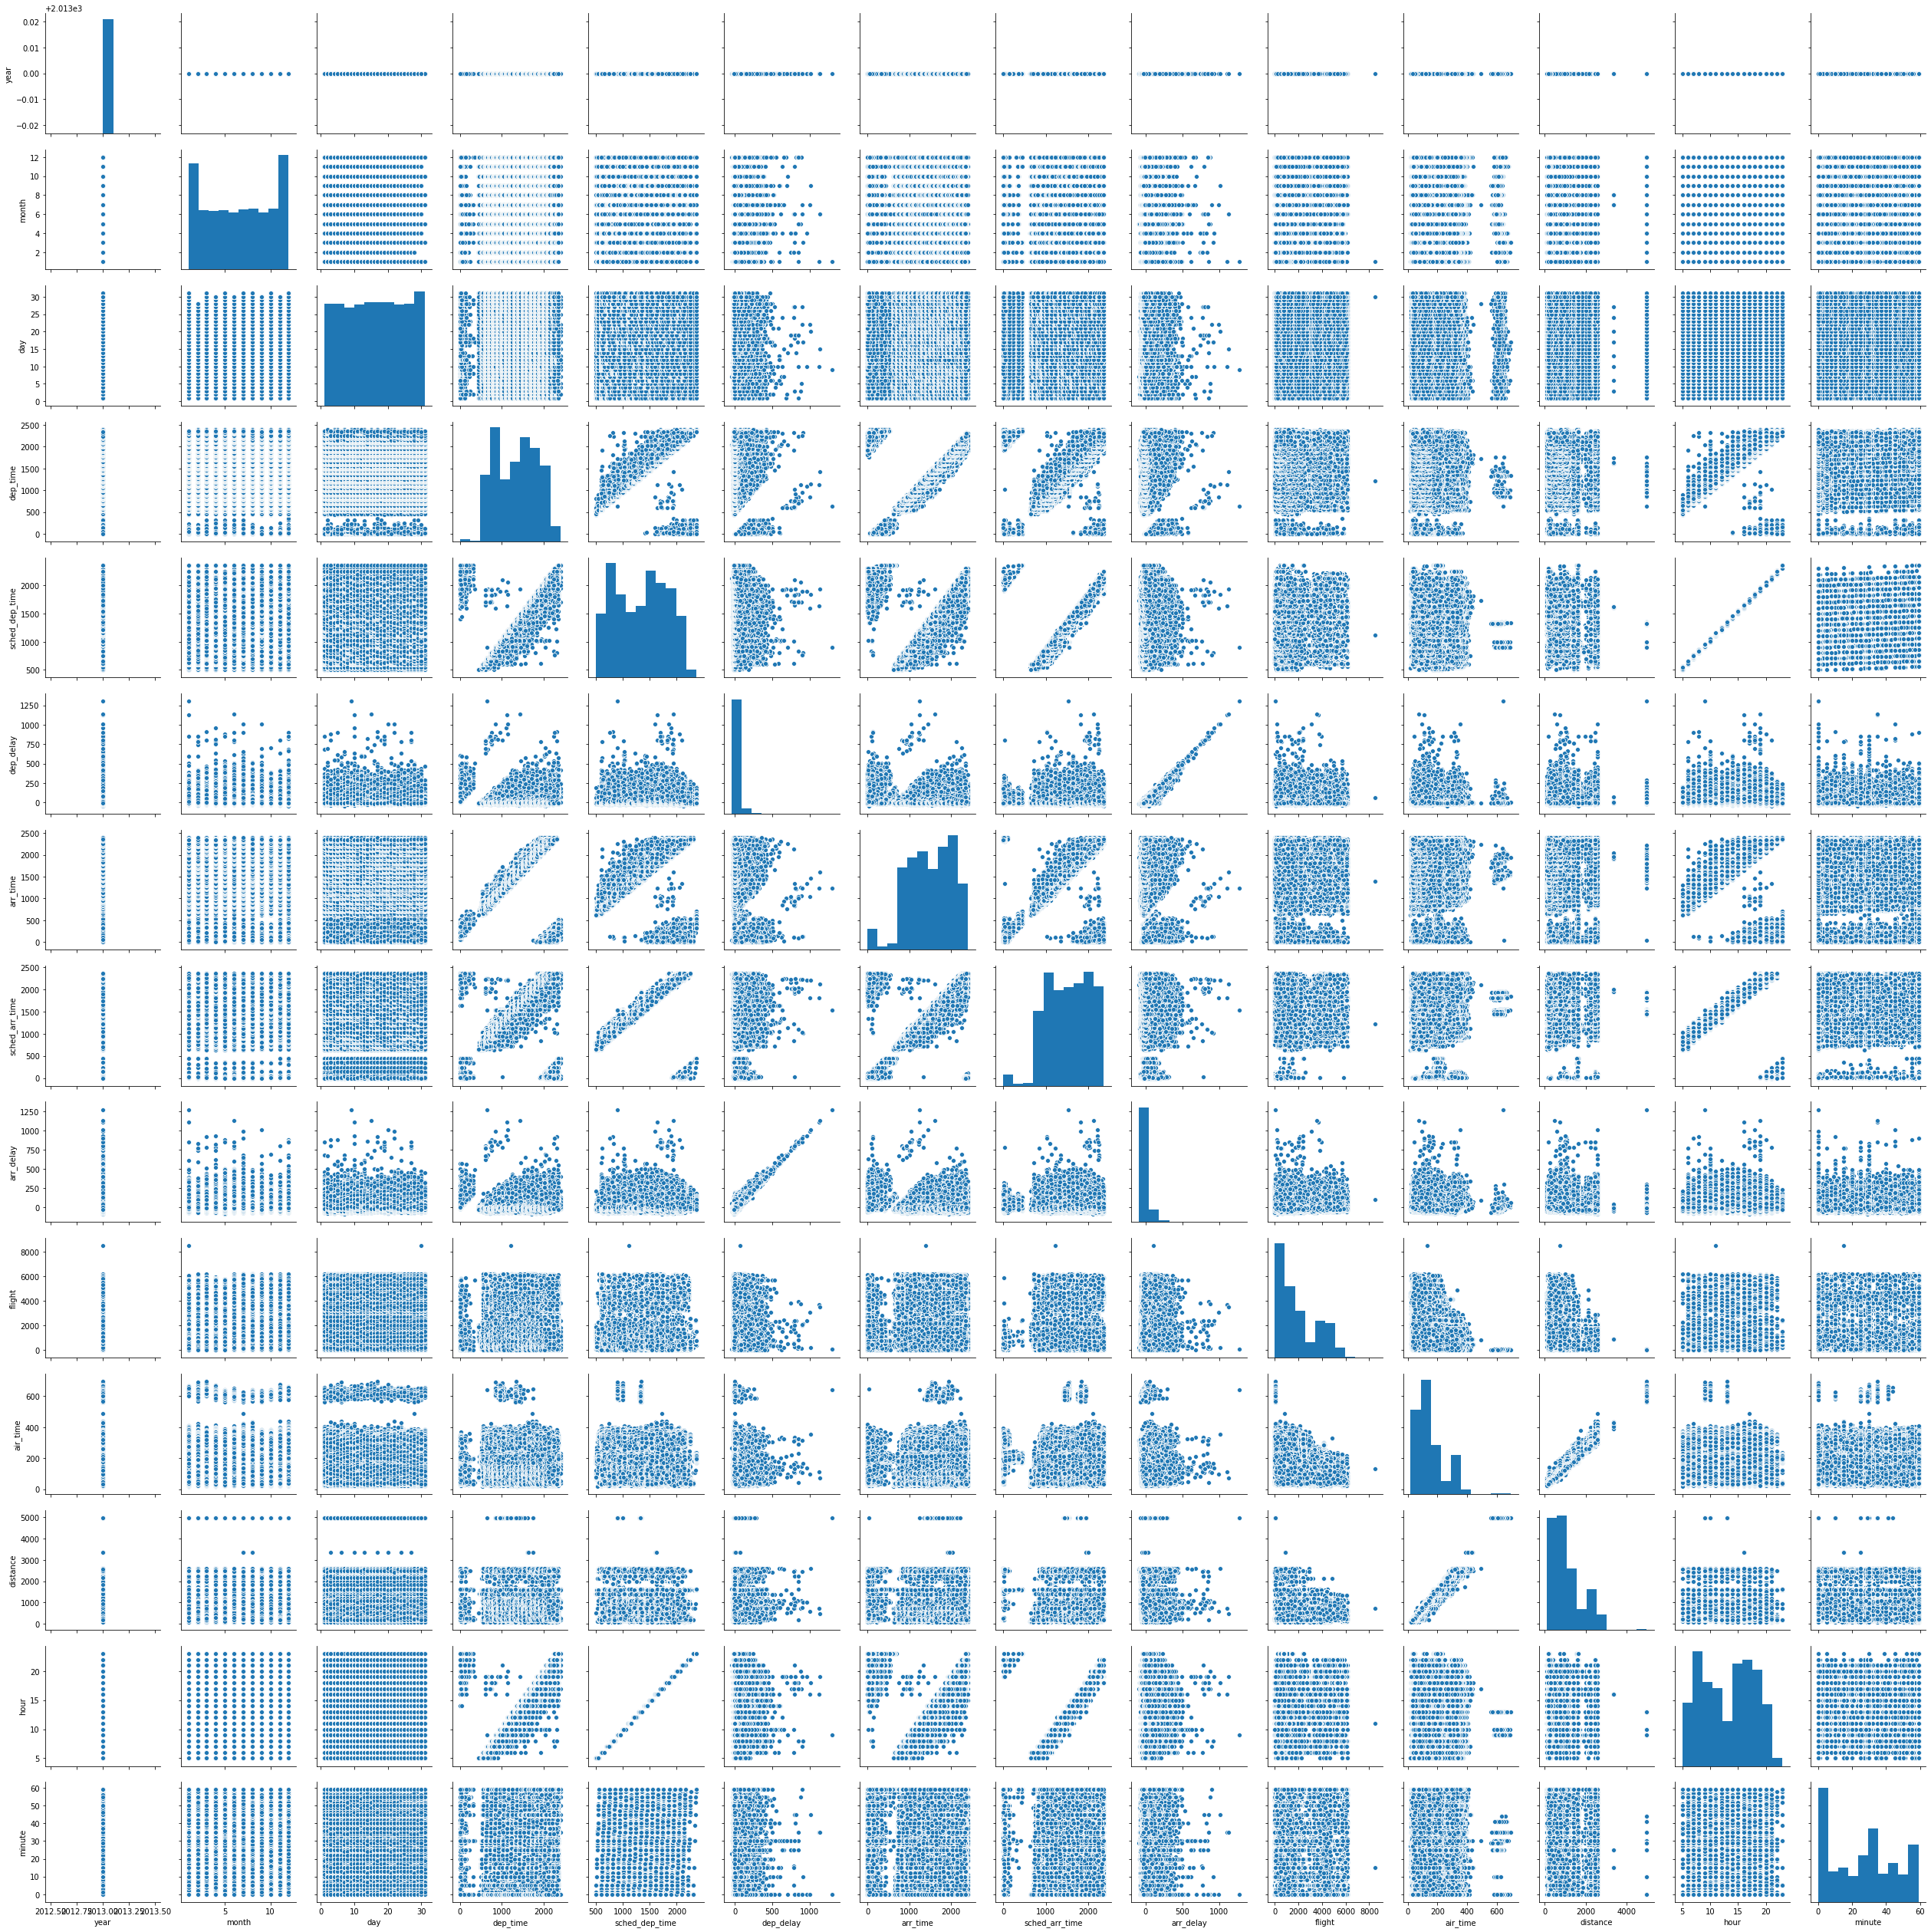

In [7]:
#Exploratory Daya Analysis
#Study the relationship between input and output variables
sns.pairplot(flights)


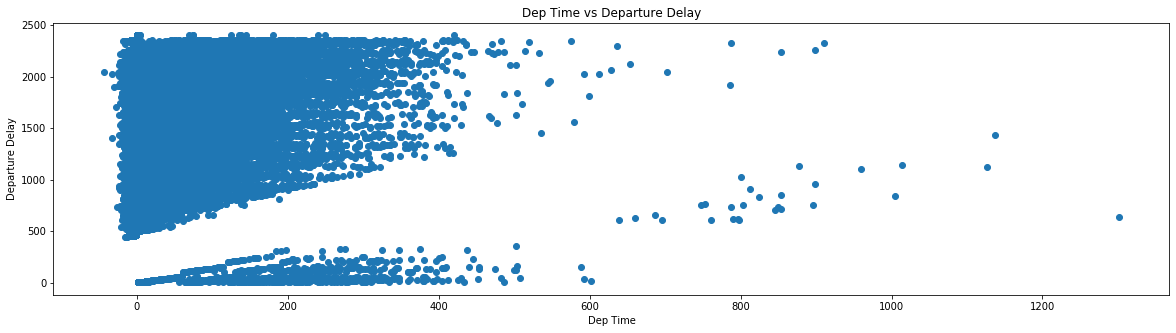

In [9]:

#Dep_time -> Dep_delay
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.scatter('dep_delay','dep_time',data=flights)
ax.set_title('Dep Time vs Departure Delay')
ax.set_xlabel('Dep Time')
ax.set_ylabel('Departure Delay');

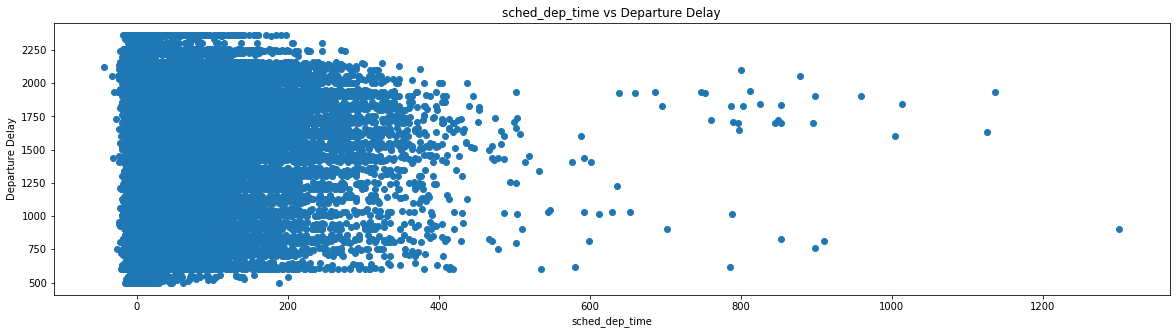

In [10]:
#sched_dep_time -> Dep_delay
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.scatter('dep_delay','sched_dep_time',data=flights)
ax.set_title('sched_dep_time vs Departure Delay')
ax.set_xlabel('sched_dep_time')
ax.set_ylabel('Departure Delay');

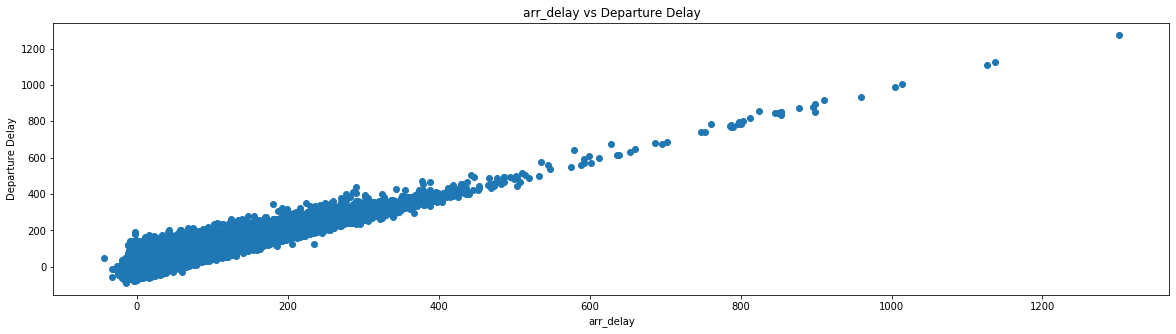

In [11]:
#arr_delay -> Dep_delay
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.scatter('dep_delay','arr_delay',data=flights)
ax.set_title('arr_delay vs Departure Delay')
ax.set_xlabel('arr_delay')
ax.set_ylabel('Departure Delay');

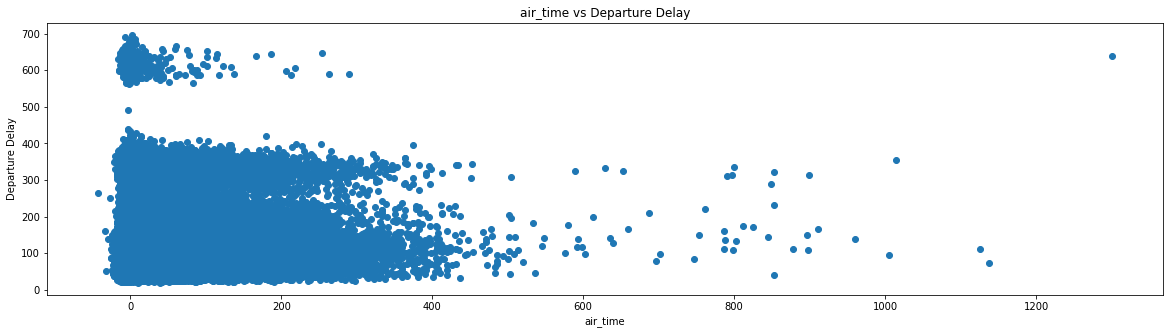

In [12]:
#arr_delay -> Dep_delay
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.scatter('dep_delay','air_time',data=flights)
ax.set_title('air_time vs Departure Delay')
ax.set_xlabel('air_time')
ax.set_ylabel('Departure Delay');

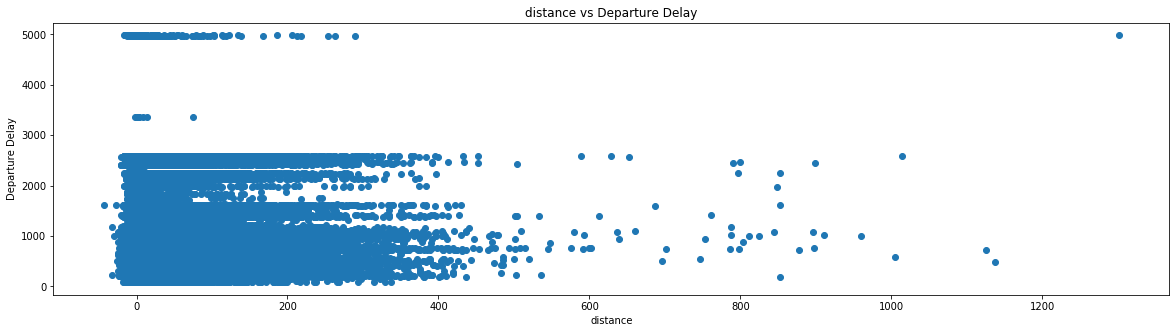

In [13]:
#distance -> Dep_delay
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.scatter('dep_delay','distance',data=flights)
ax.set_title('distance vs Departure Delay')
ax.set_xlabel('distance')
ax.set_ylabel('Departure Delay');

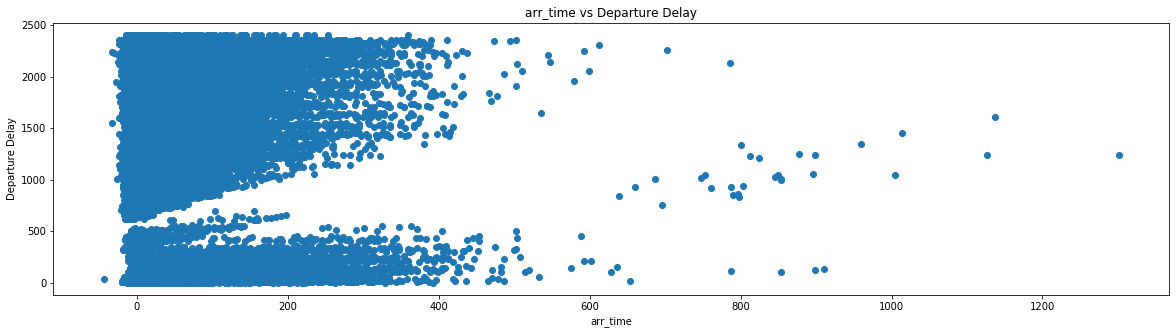

In [14]:
#arr_time -> Dep_delay
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.scatter('dep_delay','arr_time',data=flights)
ax.set_title('arr_time vs Departure Delay')
ax.set_xlabel('arr_time')
ax.set_ylabel('Departure Delay');

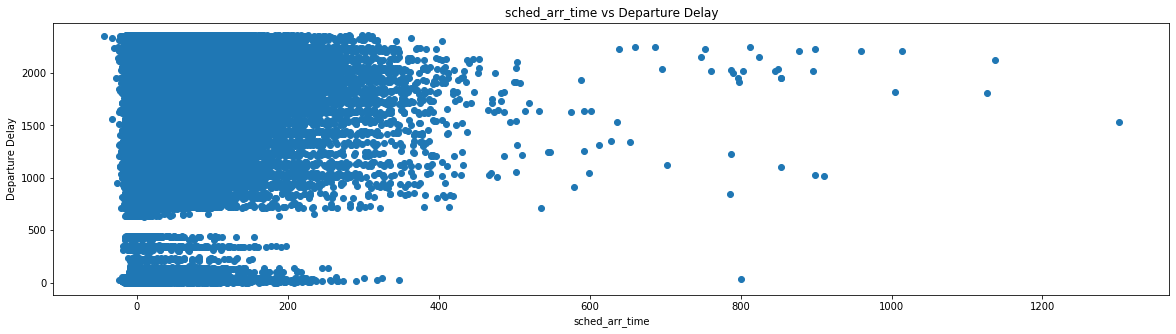

In [15]:
#sched_arr_time -> Dep_delay
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.scatter('dep_delay','sched_arr_time',data=flights)
ax.set_title('sched_arr_time vs Departure Delay')
ax.set_xlabel('sched_arr_time')
ax.set_ylabel('Departure Delay');

In [7]:
#Dropping categorical features and unused variables for now
flights = flights[['dep_time', 'sched_dep_time','arr_delay', 'air_time', 'distance', 'dep_delay', 'arr_time', 'sched_arr_time']]
flights.head()

,dep_time,sched_dep_time,arr_delay,air_time,distance,dep_delay,arr_time,sched_arr_time
0,517.0,515,11.0,227.0,1400,2.0,830.0,819
1,533.0,529,20.0,227.0,1416,4.0,850.0,830
2,542.0,540,33.0,160.0,1089,2.0,923.0,850
3,544.0,545,-18.0,183.0,1576,-1.0,1004.0,1022
4,554.0,600,-25.0,116.0,762,-6.0,812.0,837


In [8]:
#Splitting the dataset into input and output variable
input_var = flights[['dep_time', 'sched_dep_time','arr_time', 'sched_arr_time', 'arr_delay', 'air_time', 'distance' ]]
input_var.head()
output_var = flights['dep_delay']
output_var.head()

0    2.0
1    4.0
2    2.0
3   -1.0
4   -6.0
Name: dep_delay, dtype: float64

In [9]:
#Splitting the dataset into training and test
from sklearn.model_selection import train_test_split
input_vartrain, input_vartest, output_vartrain, output_vartest = train_test_split(input_var,output_var,random_state = 2)

In [ ]:
#***************************************Model building*****************************************************
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
import numpy as np
lr = LogisticRegression()
lr.fit(input_vartrain,output_vartrain)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(max_depth=10)
tree.fit(input_vartrain,output_vartrain)

In [ ]:
#Random Forest Tree
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=10)
rf.fit(input_vartrain,output_vartrain)

In [ ]:
#Prediction and Model Analysis
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#Logistic Regression
#model1 = lr.fit(Xtrain,ytrain)
PredictedVals=lr.predict(input_vartest)
print('Mean Absolute Error:', mean_absolute_error(output_vartest, PredictedVals))  
print('Mean Squared Error:', mean_squared_error(output_vartest, PredictedVals))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(output_vartest, PredictedVals)))
print('R2 : ',r2_score(output_vartest, PredictedVals))
print()


In [ ]:
#Decision Regression
#model1 = lr.fit(Xtrain,ytrain)
PredictedVals=tree.predict(input_vartest)
print('Mean Absolute Error:', mean_absolute_error(output_vartest, PredictedVals))  
print('Mean Squared Error:', mean_squared_error(output_vartest, PredictedVals))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(output_vartest, PredictedVals)))
print('R2 : ',r2_score(output_vartest, PredictedVals))
print()

In [ ]:
#RandomForest Regression
#model1 = lr.fit(Xtrain,ytrain)
PredictedVals=rf.predict(input_vartest)
print('Mean Absolute Error:', mean_absolute_error(output_vartest, PredictedVals))  
print('Mean Squared Error:', mean_squared_error(output_vartest, PredictedVals))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(output_vartest, PredictedVals)))
print('R2 : ',r2_score(output_vartest, PredictedVals))
print()